<a href="https://colab.research.google.com/github/surai01072006-byte/Rittika_Surai/blob/main/My_Answer_02_exploratory_data_analysis_with_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

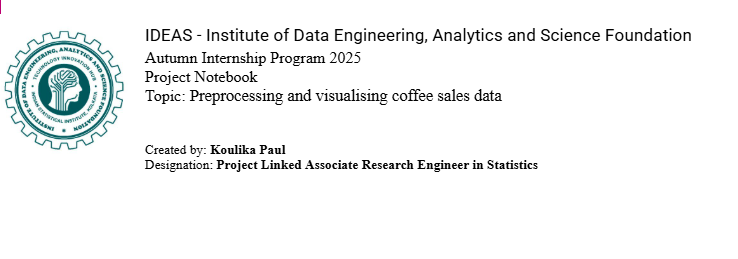

**NAME-RITTIKA SURAI**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
coffee_data=pd.read_csv("/content/drive/MyDrive/Coffee_sales.csv")
coffee_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Q1. Find the number of columns, duplicate columns, and missing values**

In [ ]:
coffee_data.shape[1]#number of columns

11

In [ ]:
coffee_data.columns.duplicated().sum()#number of duplicate columns

np.int64(0)

In [ ]:
coffee_data.isnull().sum()#number of missing values

,0
hour_of_day,0
cash_type,0
money,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0
Weekdaysort,0
Monthsort,0
Date,0


***Basic statistics of the data***

In [ ]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [ ]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [ ]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')

***Average money for each year***

In [ ]:
grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)
grouped_data

/tmp/ipython-input-3058338727.py:1: FutureWarning: The provided callable <function mean at 0x7d53327c09a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)


,money
Year,
2024,31.737634
2025,31.390011


**Q2. Find the datatype of grouped_data**

In [ ]:
grouped_data.dtype

dtype('float64')

**Q3. Find the maximum money for each month**

In [ ]:
coffee_data.groupby('Month_name')['money'].max() \
    .reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).dropna()

,money
Month_name,
Jan,35.76
Feb,35.76
Mar,38.70
Apr,38.70
May,37.72
Jun,37.72
Jul,37.72
Aug,32.82
Sep,35.76


***Distribution of money over months***

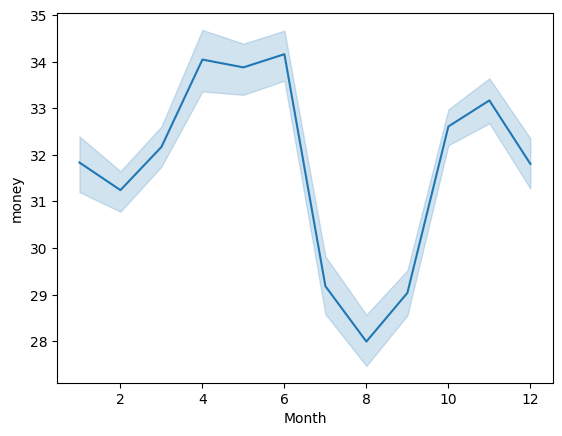

In [ ]:
sns.lineplot(x=coffee_data['Month'],y='money',data=coffee_data)
plt.show()

***The density of money over years***

<Axes: xlabel='Year', ylabel='money'>

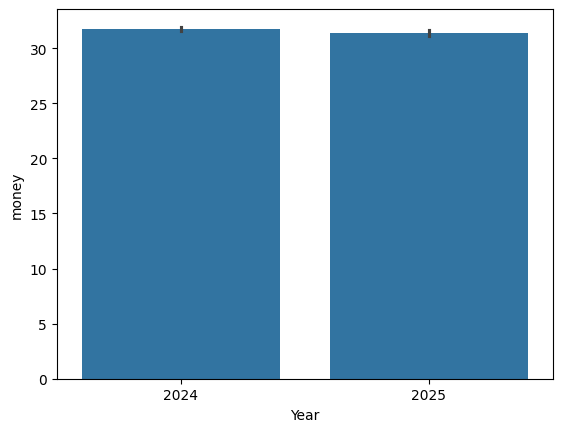

In [ ]:
sns.barplot(data= coffee_data,x='Year',y= coffee_data['money'])


**Q4. Find the distribution of money over coffee names**


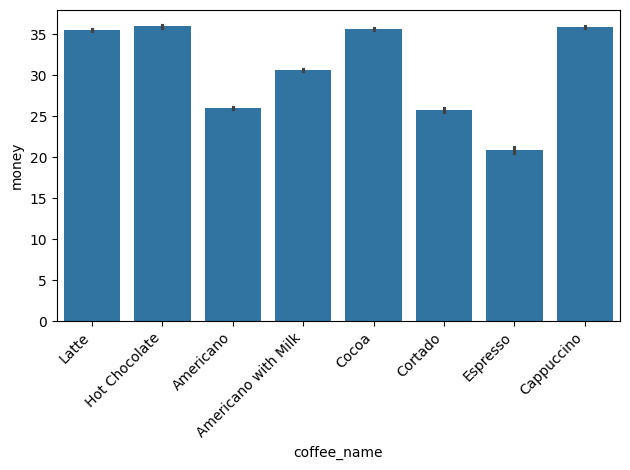

In [ ]:
sns.barplot(data=coffee_data, x='coffee_name', y='money')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

***Times of the Day the dataset holds***

In [ ]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


**Q5. How many types of coffees are present in the dataset?**

In [ ]:
print("Number of coffee types:", coffee_data['coffee_name'].nunique())

Number of coffee types: 8


***Max money from coffee_name***

In [ ]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


**Q6. Find the average money made at what time of the day.**

In [ ]:
average_money_by_time_of_day = coffee_data.groupby('Time_of_Day')['money'].mean()
print(average_money_by_time_of_day)

Time_of_Day
Afternoon    31.643187
Morning      30.422693
Night        32.890904
Name: money, dtype: float64


***Generate 100 synthetic data rows***

In [ ]:

date_range= date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({"date": date_range, "value": values})
df

,date,value
0,2023-01-01,0.866474
1,2023-01-02,1.990247
2,2023-01-03,1.314781
3,2023-01-04,1.741238
4,2023-01-05,2.804542
...,...,...
95,2023-04-06,4.528059
96,2023-04-07,3.047175
97,2023-04-08,3.142486
98,2023-04-09,4.319301


**Q7. Insert synthetic data into the given data set and analyse as above.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
coffee_shop_sales_data=pd.read_csv("/content/Synthetic_Data_2025-09-17.csv")
coffee_shop_sales_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,9.9997,card,38.6994,Latte,Night,Sun,Feb,4.9988,2.9992,2024-03-01,16:47:09.557000
1,12.0001,card,38.6868,Hot Chocolate,Morning,Wed,Apr,4.9987,3.0009,2024-03-01,11:30:27.553000
2,11.9995,card,38.6711,Cappuccino,Afternoon,Wed,Jun,5.0028,3.0011,2024-03-01,17:44:05.067000
3,12.9993,card,28.7088,Cortado,Morning,Wed,Apr,4.9961,2.9988,2024-03-01,18:06:12.419000
4,12.9983,card,38.6665,Cappuccino,Afternoon,Thu,Jan,4.9947,3.0016,2024-03-01,09:02:38.061000
...,...,...,...,...,...,...,...,...,...,...,...
3542,19.4466,card,25.2703,Hot Chocolate,Afternoon,Tue,Jan,1.2669,1.3821,2025-03-23,13:44:18.516000
3543,19.4499,card,25.2112,Hot Chocolate,Night,Thu,Apr,1.2655,1.3786,2025-03-23,09:15:46.155000
3544,19.4519,card,25.1940,Latte,Morning,Tue,Oct,1.2651,1.3749,2025-03-23,10:45:02.380000
3545,19.4558,card,25.1675,Cappuccino,Morning,Wed,Feb,1.2650,1.3740,2025-03-23,21:41:09.070000


Q1. Find the number of columns, duplicate columns, and missing values

In [ ]:
coffee_shop_sales_data.shape[1]#number of columns

11

In [ ]:
coffee_shop_sales_data.columns.duplicated().sum()#number of duplicate columns

np.int64(0)

In [ ]:
coffee_shop_sales_data.isnull().sum()#number of missing values

,0
hour_of_day,0
cash_type,0
money,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0
Weekdaysort,0
Monthsort,0
Date,0


Basic Statistics of data

In [ ]:
coffee_shop_sales_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.319099,31.310162,3.809540,6.331670
std,4.171850,4.896115,1.943459,3.418522
min,6.538500,18.133600,1.000000,1.001500
25%,10.868700,26.420450,2.147550,2.995400
50%,14.190500,32.582300,3.696500,6.570000
75%,17.817200,35.755900,5.366700,9.054000
max,21.997900,38.699400,6.999900,11.998000


In [ ]:
coffee_shop_sales_data.dtypes

,0
hour_of_day,float64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,float64
Monthsort,float64
Date,object


In [ ]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')

Average money for each year

In [ ]:
coffee_shop_sales_data['Date']= pd.to_datetime(coffee_shop_sales_data['Date']) ## converting the object datatype to datetime
coffee_shop_sales_data['Year']=(coffee_shop_sales_data['Date'].dt.year).astype('int')

grouped_data=coffee_shop_sales_data.groupby('Year')['money'].agg(np.mean)
grouped_data

/tmp/ipython-input-3795537666.py:4: FutureWarning: The provided callable <function mean at 0x7d53327c09a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data=coffee_shop_sales_data.groupby('Year')['money'].agg(np.mean)


,money
Year,
2024,31.608239
2025,30.487051


Q2. Find the datatype of grouped_data

In [ ]:
grouped_data.dtype

dtype('float64')

Q3. Find the maximum money for each month

In [ ]:
max_money_by_month = coffee_shop_sales_data.groupby('Month_name')['money'].max() \
    .reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).dropna()
print(max_money_by_month)

Month_name
Jan    38.6665
Feb    38.6994
Mar    38.5657
Apr    38.6868
May    38.5215
Jun    38.6711
Jul    38.6577
Aug    38.6610
Sep    38.3238
Oct    38.4939
Nov    38.5779
Dec    38.6319
Name: money, dtype: float64


Distribution of money over months

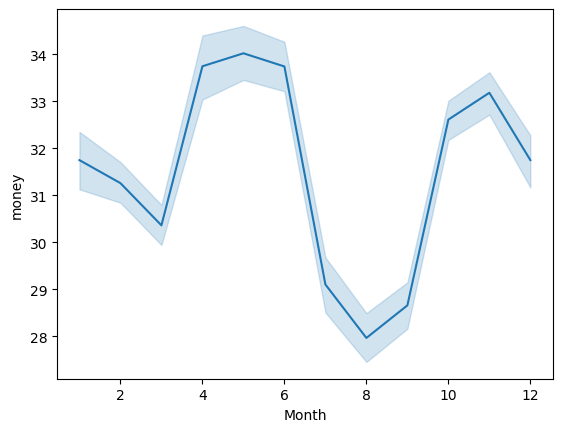

In [ ]:
sns.lineplot(x=coffee_shop_sales_data['Month'],y='money',data=coffee_shop_sales_data)
plt.show()

The density of money over years

<Axes: xlabel='Year', ylabel='money'>

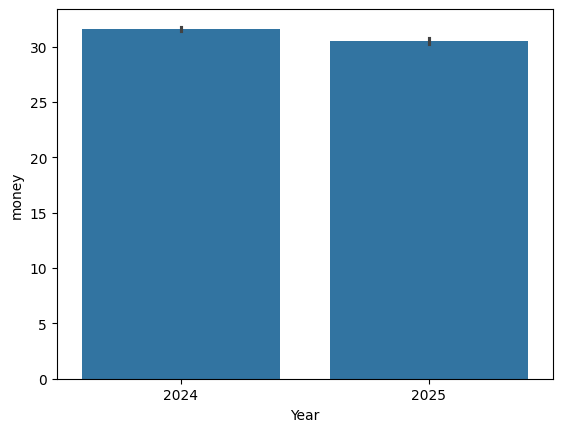

In [ ]:
sns.barplot(data= coffee_shop_sales_data,x='Year',y= coffee_shop_sales_data['money'])

Q4.Find the distribution of money over coffee names

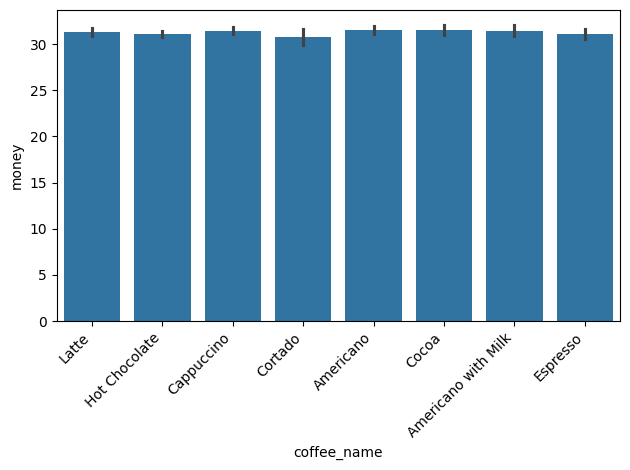

In [ ]:
sns.barplot(data=coffee_shop_sales_data, x='coffee_name', y='money')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()


Times of the Day the dataset holds

In [ ]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


Q5. How many types of coffees are present in the dataset?

In [ ]:
print("Number of coffee types:", coffee_shop_sales_data['coffee_name'].nunique())

Number of coffee types: 8


Max money from coffee name

In [ ]:
coffee_shop_sales_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,38.6610
Americano with Milk,38.6380
Cappuccino,38.6711
Cocoa,38.4981
Cortado,38.4321
Espresso,38.5502
Hot Chocolate,38.6868
Latte,38.6994


Q6. Find the average money made at what time of the day.

In [ ]:
average_money_by_time_of_day = coffee_shop_sales_data.groupby('Time_of_Day')['money'].mean()
print(average_money_by_time_of_day)

Time_of_Day
Afternoon    31.314052
Morning      31.410388
Night        31.208088
Name: money, dtype: float64


Generate 100 synthetic data rows

In [ ]:
date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df_synthetic = pd.DataFrame({"date": date_range, "value": values})
df_synthetic

,date,value
0,2023-01-01,-1.107778
1,2023-01-02,-0.196242
2,2023-01-03,-0.177430
3,2023-01-04,-0.220910
4,2023-01-05,-0.407530
...,...,...
95,2023-04-06,2.141095
96,2023-04-07,2.597739
97,2023-04-08,2.264386
98,2023-04-09,2.761218
